# Inversion with topography
In this notebook, we will learn how to add topography and perform 2D inversion with rectangular and triangular meshes. The files needed can be found in `examples/dc-2d-topo/`.

In [8]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # just to make it cleaner in the notebook
import os
import sys
sys.path.append((os.path.relpath('../src'))) # add here the relative path of the API folder
testdir = '../src/examples/dc-2d-topo/'
import numpy as np # this will be used to read the topography file
from resipy import R2

First, let's create an R2 object and import the survey as usual.

In [9]:
k = R2() # create new R2 object and use default working directory
k.createSurvey(os.path.join(testdir, 'syscal.csv'))

Working directory is: /media/jkl/data/phd/tmp/pyr2/src/resipy
clearing dirname
600/636 reciprocal measurements found.
10 measurements error > 20 %


We can also plot the pseudo-section. Note that this one remains flat event when there is topogragraphy involved.

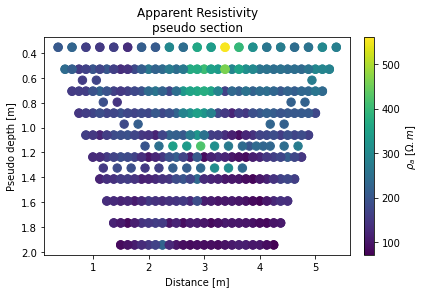

In [10]:
k.showPseudo()

If we take a look at the electrodes position by plotting `R2.elec` we can see that there is no topography yet (all the values in the third column (=z) are 0.0).

In [11]:
k.elec

,x,y,z,remote,buried,label
0,0.00,0.0,0.0,False,False,1
1,0.25,0.0,0.0,False,False,2
2,0.50,0.0,0.0,False,False,3
3,0.75,0.0,0.0,False,False,4
4,1.00,0.0,0.0,False,False,5
5,1.25,0.0,0.0,False,False,6
6,1.50,0.0,0.0,False,False,7
7,1.75,0.0,0.0,False,False,8
8,2.00,0.0,0.0,False,False,9
9,2.25,0.0,0.0,False,False,10


Then we can load a csv file that will add topography for each electrode. The csv file should be of the form X,Y,Z and no headers are needed.

In [12]:
k.importElec(os.path.join(testdir + 'elec.csv'))
print(k.elec)

       x    y       z  remote  buried label
0   0.00  0.0  29.499   False   False     1
1   0.25  0.0  29.504   False   False     2
2   0.50  0.0  29.509   False   False     3
3   0.75  0.0  29.516   False   False     4
4   1.00  0.0  29.478   False   False     5
5   1.25  0.0  29.461   False   False     6
6   1.50  0.0  29.454   False   False     7
7   1.75  0.0  29.428   False   False     8
8   2.00  0.0  29.416   False   False     9
9   2.25  0.0  29.411   False   False    10
10  2.50  0.0  29.398   False   False    11
11  2.75  0.0  29.362   False   False    12
12  3.00  0.0  29.329   False   False    13
13  3.25  0.0  29.245   False   False    14
14  3.50  0.0  29.159   False   False    15
15  3.75  0.0  29.083   False   False    16
16  4.00  0.0  29.010   False   False    17
17  4.25  0.0  28.929   False   False    18
18  4.50  0.0  28.872   False   False    19
19  4.75  0.0  28.761   False   False    20
20  5.00  0.0  28.672   False   False    21
21  5.25  0.0  28.593   False   

We can now create a mesh either triangular or rectangular.

Creating triangular mesh...Reading mesh.msh
Gmsh version == 3.x
reading node coordinates...
Determining element type...Triangle
Reading connection matrix...
ignoring 0 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file
ResIPy Estimated RAM usage = 0.006876 Gb
done


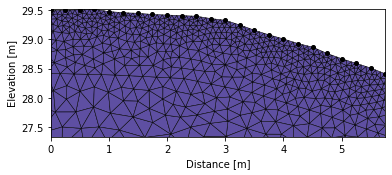

In [13]:
k.createMesh(typ='trian') # or trian for triangular mesh
k.showMesh()

We can finally invert the data on this mesh. Note that it might take a while so be patient.

In [14]:
k.invert()

Writing .in file and protocol.dat... done!
--------------------- MAIN INVERSION ------------------


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.0 <<

 >> D a t e : 02 - 07 - 2020
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat                      
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 Measurements read:   336     Measurements rejected:     0
   Geometric mean of apparent resistivities:  0.35349E+03

 >> Total Memory required is:          0.036 Gb

   Iteration   1
     Initial RMS 

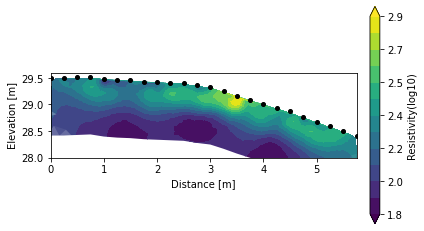

In [15]:
k.showResults(contour=True, sens=True, zlim=[28,29.6]) # with contour

## In a nutshell

Working directory is: /media/jkl/data/phd/tmp/pyr2/src/resipy
clearing dirname
600/636 reciprocal measurements found.
10 measurements error > 20 %
Creating triangular mesh...Reading mesh.msh
Gmsh version == 3.x
reading node coordinates...
Determining element type...Triangle
Reading connection matrix...
ignoring 0 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file
ResIPy Estimated RAM usage = 0.006876 Gb
done
Writing .in file and protocol.dat... done!
--------------------- MAIN INVERSION ------------------


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.0 <<

 >> D a t e : 02 - 07 - 2020
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat                      
 >> R e g u 

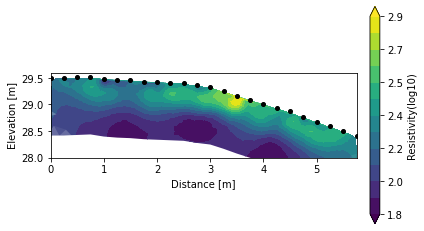

In [16]:
k = R2()
k.createSurvey(testdir + 'syscal.csv')
k.importElec(testdir + 'elec.csv')
k.invert()
k.showResults(contour=True, sens=True, zlim=[28,29.6])